***Imoport function ที่จำเป็น***

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import datetime as dt
from datetime import datetime
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error
from math import sqrt


***นำข้อมูล การตีพิมพ์งานวิจัยเกี่ยวกับกระท่อมในแต่ละปี เข้า***

In [44]:
df = pd.read_excel(r'C:\Users\beam_\Desktop\Project 314\Linear regression\Kratom Research by Year .xlsx')

ทำการ plot กราฟ เพิ่อดูการเรียงตัวของข้อมูลการตีพิมพ์งานวิจัยเกี่ยวกับกระท่อม

<function matplotlib.pyplot.show(close=None, block=None)>

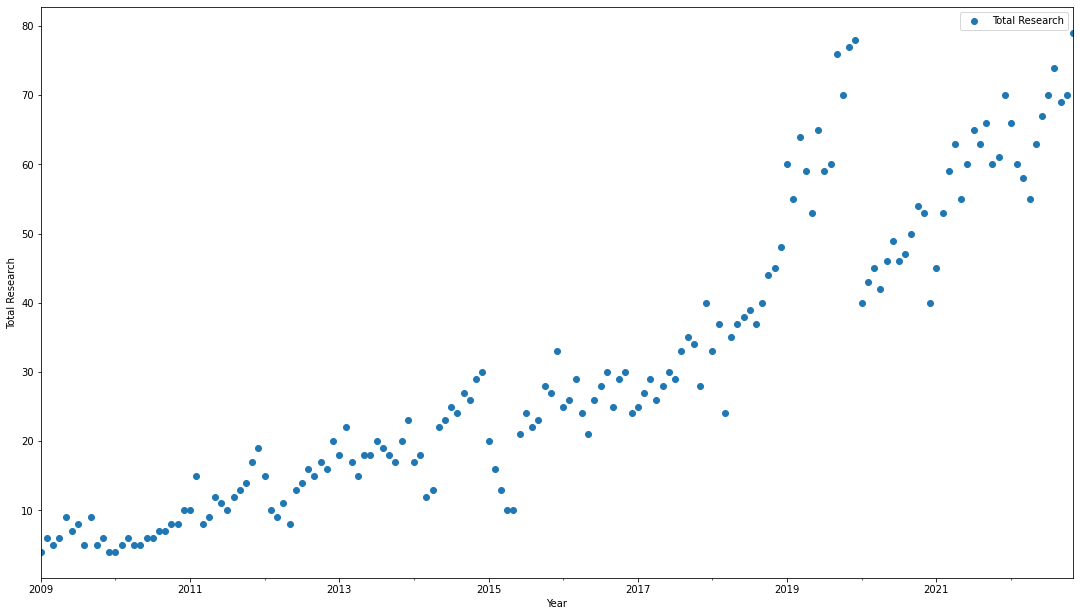

In [45]:
df.plot(x='Date',y='Total Research',style='o',figsize= (18.5, 10.5))
plt.xlabel('Year')
plt.ylabel('Total Research')
plt.show

จากการกระจายข้องข้อมูลแล้วสรุปได้ว่า การเรียงตัวของข้อมูลแบบนี้สามารถนำเข้าสู่ Model ได้ทั้ง Linear Regression และ Polynomial Regression

In [46]:
df.Date.head()

0   2009-01-31
1   2009-02-28
2   2009-03-31
3   2009-04-30
4   2009-05-31
Name: Date, dtype: datetime64[ns]

**เปลี่ยนรูปแบบของวันที่ไปอยู่ในรูปแบบของ The Proleptic Gregorian ordinal**

โดยเป็นการเปลี่ยนจากวันที่ทั่วไป (2021-12-21) เป็นจำนวนวันที่ผ่านวันที่ 0001-01-01 ไปว่าได้ผ่านไปแล้วกี่วัน

เผื่อให้ตัว Model Regression ของเราสามารถนำวันที่มาคำนวณได้

In [47]:
df['Date_use']=df['Date'].map(dt.datetime.toordinal)
df

,Date,Total Research,Date_use
0,2009-01-31,4,733438
1,2009-02-28,6,733466
2,2009-03-31,5,733497
3,2009-04-30,6,733527
4,2009-05-31,9,733558
...,...,...,...
162,2022-07-31,70,738367
163,2022-08-31,74,738398
164,2022-09-30,69,738428
165,2022-10-31,70,738459


แยกวันที่ที่แปลงค่าแล้ว และ จำนวยงานวิจัยที่ตีพิมพ์ออกโดย
X = วันที่แบบ The Proleptic Gregorian ordinal
y = จำนวนงานวิจัยที่ตีพิมพ์

In [48]:
X = pd.DataFrame(df['Date_use'])
y = pd.DataFrame(df['Total Research'])

แบ่ง Data สำหรับ Train และ Test โดยใช้ส่วนแบ่ง 80:20

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

ทำการสร้าง Model LinearRegression

In [50]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

ทำการ plot กราฟเพื่อดู Regression line ของ model Linear Regression

C:\Users\beam_\AppData\Local\Temp\ipykernel_7448\3054868764.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '2010', '2013', '2016', '2018','2021'])


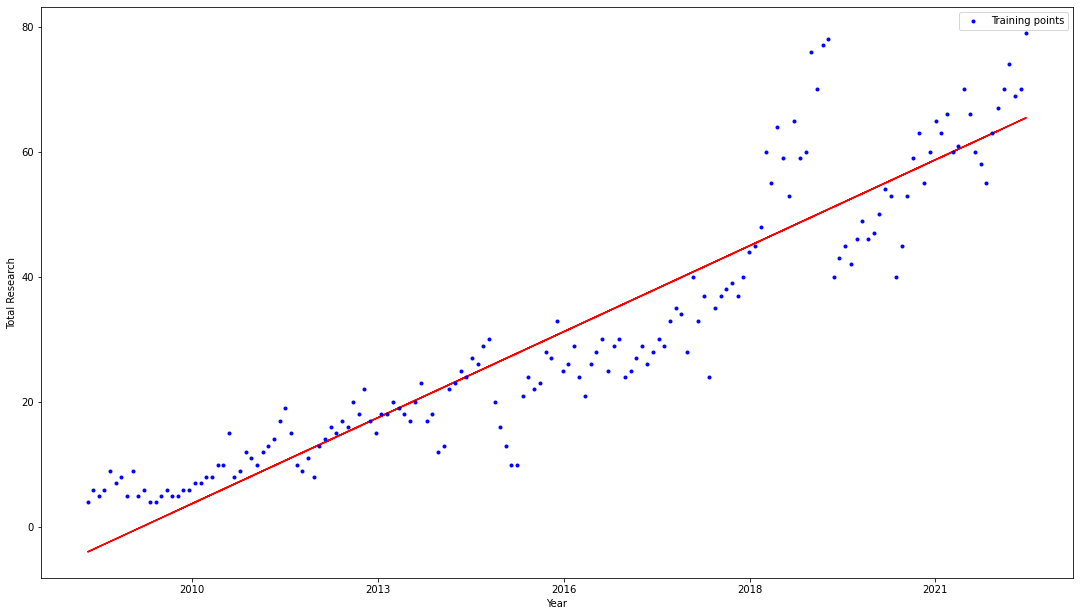

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(x_train,lr.predict(x_train), color='r')
ax.plot(X,y,'b.',label='Training points')
ax.set_xticklabels(['0', '2010', '2013', '2016', '2018','2021'])
plt.xlabel("Year")
plt.ylabel("Total Research")
plt.legend()
plt.show()

ทำการวัด performance measure ของ model Linear Regression ด้วย R2 score และ MAE

In [52]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8815905991180497
4.878127027281367


นำเอา Model Linear Regression มาปรับให้กลายเป็น Polynomial Regression 

In [53]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [54]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

ทำการ plot กราฟเพื่อดู Regression line ของ model Polynomial Regression

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\beam_\AppData\Local\Temp\ipykernel_7448\604696086.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '2010', '2013', '2016', '2018','2021'])


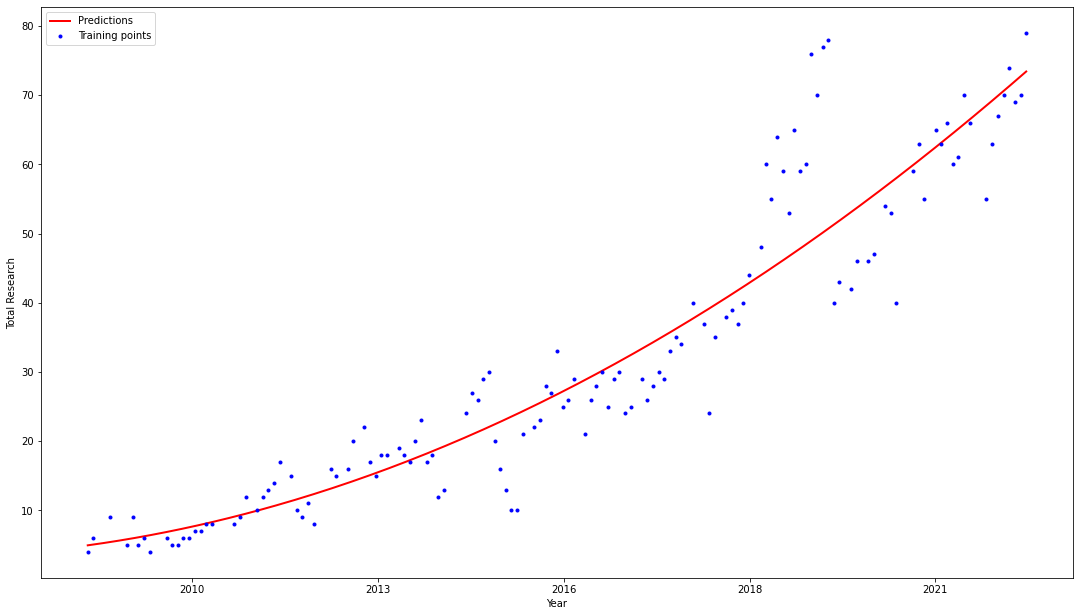

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
X_new = np.linspace(x_train.min(),x_train.max(),300).reshape(-1,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
ax.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
ax.plot(x_train, y_train, "b.",label='Training points')
ax.set_xticklabels(['0', '2010', '2013', '2016', '2018','2021'])
plt.xlabel("Year")
plt.ylabel("Total Research")
plt.legend()
plt.show()

ทำการวัด performance measure ของ model Polynomial Regression ด้วย R2 score และ MAE

In [56]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9149658286300534
4.035967188431909


คะแนนของ Model Polynomial Regression นั้นมีคะแนนดีกว่าแบบ Linear เล็กน้อย 

***ทางผู้จัดทำจึงเลือก Model Polynomial Regression มาใช้ในการทำงานในการทำนาย***

นำวันที่เราต้องการทำนายจำนวนการตีพิมพ์ของงานวิจัยมาทำการแปลงรูปแบบของวันที่ให้อยู่ในรูปแบบของ The Proleptic Gregorian ordinal 

โดยวันที่ที่เราเลือกมาทำนายในที่นี้ก็คือ ทุกๆเดือนของปี 2023

In [57]:
Future = [datetime(2023, 1, 31,),datetime(2023, 2, 28,),datetime(2023, 3, 31,),datetime(2023, 4, 30,),datetime(2023, 5, 31,),datetime(2023, 6, 30,),datetime(2023, 7, 31,),datetime(2023, 8, 31,),datetime(2023, 9, 30,),datetime(2023, 10, 31,),datetime(2023, 11, 30,),datetime(2023, 12, 31,)]
Future_or = []
for i in Future:
    Future_or.append(i.toordinal())
print(Future_or)


[738551, 738579, 738610, 738640, 738671, 738701, 738732, 738763, 738793, 738824, 738854, 738885]


นำวันที่ที่แปลงแล้ว และ ยังไม่ได้แปลงรวมกันให้อยู่ในรูปแบบของ Pandas

In [58]:
predict = pd.DataFrame(np.column_stack([Future, Future_or,]), 
                               columns=['Date', 'Date_use'])
predict

,Date,Date_use
0,2023-01-31,738551
1,2023-02-28,738579
2,2023-03-31,738610
3,2023-04-30,738640
4,2023-05-31,738671
5,2023-06-30,738701
6,2023-07-31,738732
7,2023-08-31,738763
8,2023-09-30,738793
9,2023-10-31,738824


ทำการทำนายจำนวนการตีพิมพ์งานวิจัยเกี่ยวกับกระท่อม

In [59]:
z = pd.DataFrame(predict['Date_use'])
f_poly_features = poly.fit_transform(z.values.reshape(-1, 1))
pre = lr.predict(f_poly_features)
pre

array([[74.88895903],
       [75.55255681],
       [76.29081917],
       [77.00883336],
       [77.754467  ],
       [78.4796147 ],
       [79.23261963],
       [79.98937062],
       [80.72527704],
       [81.48939932],
       [82.23243925],
       [83.00393281]])

นำผลลัพธ์เข้ามารวมให้อยู่ในรูปแบบของ Pandas

In [60]:
predict['Total Research'] = pre
predict

,Date,Date_use,Total Research
0,2023-01-31,738551,74.888959
1,2023-02-28,738579,75.552557
2,2023-03-31,738610,76.290819
3,2023-04-30,738640,77.008833
4,2023-05-31,738671,77.754467
5,2023-06-30,738701,78.479615
6,2023-07-31,738732,79.232620
7,2023-08-31,738763,79.989371
8,2023-09-30,738793,80.725277
9,2023-10-31,738824,81.489399


นำตารางที่เราทำการทำนายปี 2023 เข้าไปรวมกับ Dataset หลักของเรา

In [61]:
df = pd.concat([df,predict],ignore_index=True)
df

,Date,Total Research,Date_use
0,2009-01-31,4.000000,733438
1,2009-02-28,6.000000,733466
2,2009-03-31,5.000000,733497
3,2009-04-30,6.000000,733527
4,2009-05-31,9.000000,733558
...,...,...,...
174,2023-08-31,79.989371,738763
175,2023-09-30,80.725277,738793
176,2023-10-31,81.489399,738824
177,2023-11-30,82.232439,738854


ทดลอง Plot กราฟเพื่อดูว่าการตีพิมพ์งานวิจัยเกี่ยวกับพืชกระท่อมจะยังได้รับความนิยมอยู่หรือไม่

C:\Users\beam_\AppData\Local\Temp\ipykernel_7448\225648902.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '2010', '2013', '2016', '2018','2021','2023'])


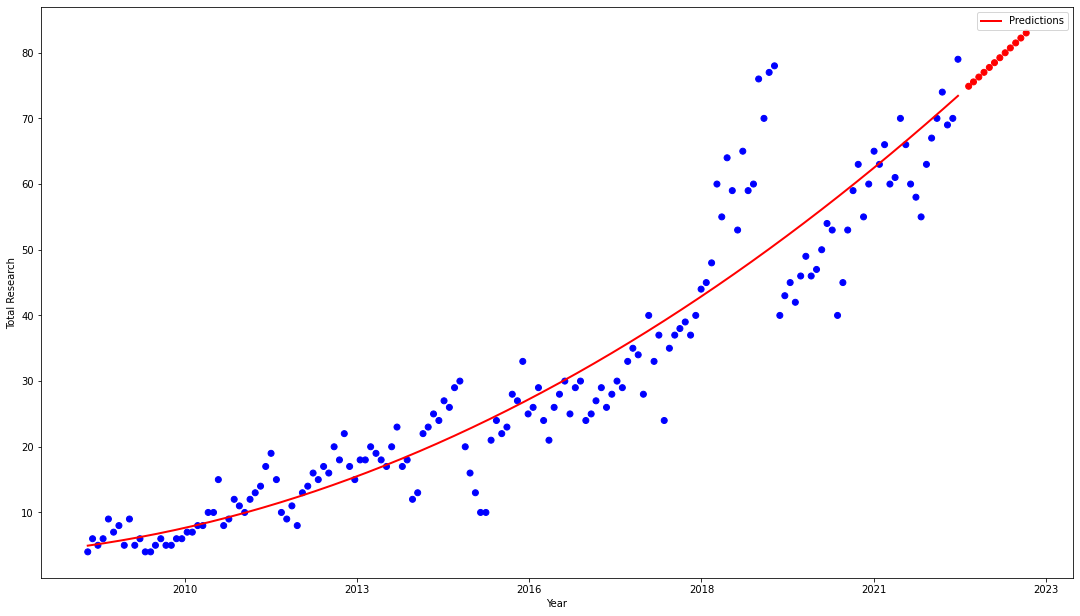

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
colors = np.where(df["Date_use"]>= 738551 ,'r','b')
ax.scatter(df['Date_use'],df['Total Research'],color=colors)
ax.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
ax.set_xticklabels(['0', '2010', '2013', '2016', '2018','2021','2023'])
plt.xlabel("Year")
plt.ylabel("Total Research")
plt.legend()
plt.show()

***ผลลัพธ์ที่ได้***

งานวิจัยเกี่ยวกับกระท่อมจะยังได้รับความสนใจต่อไปในอีกหลายปีข้างหน้า แสดงให้เห็นว่าพืชกระท่อมยังเป็นสมุนไพรทางเลือกที่ผู้คนทั่วโลกเล็งเห็นถึงคุณประโยชน์และคุณค่าของพืชเหล่า นี่จึงเป็นข้อสนับสนุนหลักของเราในการเลือกสมุนไพรกระท่อมเข้ามาใช้ในผลิตภัณท์ของเรา
